Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
**Activity** | HOA 11 Prepare CNN & LSTM
**Name** | Escalicas, Peter Allen
**Section** | CPE32S3
**Date Performed**: | 05/7/24
**Date Submitted**: | 05/7/24
**Instructor**: | Engr. Richard Roman

<hr>

# Task 1: Load the dataset and examine it.

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv

series = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv')

print(series)

            Date    Open    High     Low   Close    Volume Name
0     2006-01-03   82.45   82.55   80.81   82.06  11715200  IBM
1     2006-01-04   82.20   82.50   81.33   81.95   9840600  IBM
2     2006-01-05   81.40   82.90   81.00   82.50   7213500  IBM
3     2006-01-06   83.95   85.03   83.41   84.95   8197400  IBM
4     2006-01-09   84.10   84.25   83.38   83.73   6858200  IBM
...          ...     ...     ...     ...     ...       ...  ...
3015  2017-12-22  151.82  153.00  151.50  152.50   2990583  IBM
3016  2017-12-26  152.51  153.86  152.50  152.83   2479017  IBM
3017  2017-12-27  152.95  153.18  152.61  153.13   2149257  IBM
3018  2017-12-28  153.20  154.12  153.20  154.04   2687624  IBM
3019  2017-12-29  154.17  154.72  153.42  153.42   3327087  IBM

[3020 rows x 7 columns]


In [15]:
series.head(20)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
5,2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM
6,2006-01-11,84.37,84.81,83.40,84.17,5776500,IBM
7,2006-01-12,83.82,83.96,83.40,83.57,4926500,IBM
8,2006-01-13,83.00,83.45,82.50,83.17,6921700,IBM
9,2006-01-17,82.80,83.16,82.54,83.00,8761700,IBM


In [16]:
series.tail(20)

,Date,Open,High,Low,Close,Volume,Name
3000,2017-12-01,154.40,155.02,152.91,154.76,5567852,IBM
3001,2017-12-04,155.96,156.80,155.07,156.46,4664316,IBM
3002,2017-12-05,156.45,156.74,154.68,155.35,5068043,IBM
3003,2017-12-06,154.10,156.22,154.09,154.10,3410728,IBM
3004,2017-12-07,153.59,154.45,153.26,153.57,3771429,IBM
3005,2017-12-08,154.81,155.03,153.55,154.81,3520281,IBM
3006,2017-12-11,155.46,155.89,154.57,155.41,4102719,IBM
3007,2017-12-12,156.74,157.85,155.16,156.74,6321801,IBM
3008,2017-12-13,156.60,156.73,153.89,153.91,5661618,IBM
3009,2017-12-14,154.60,155.11,153.70,154.00,4637440,IBM


# Task 2: Check for missing values.

In [17]:
series.isnull().sum()

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

Observation:

As we can see for this dataset we have a total of 2 null values for column Open and Low.

In [18]:
series = series.dropna()
series.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

# Task 3: Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [19]:
# Filter the DataFrame to include only the 'Date' and 'Close' columns
series = series.loc[:, ['Date', 'High']]

In [20]:
series['Date'] = pd.to_datetime(series['Date']) #in order to print the values in the plot

train = series.loc[series['Date'] < '2017']
test = series.loc[series['Date'] >= '2017']
print('Rows in training set:', train.shape[0])
print('Rows in test set:', test.shape[0])

Rows in training set: 2769
Rows in test set: 250


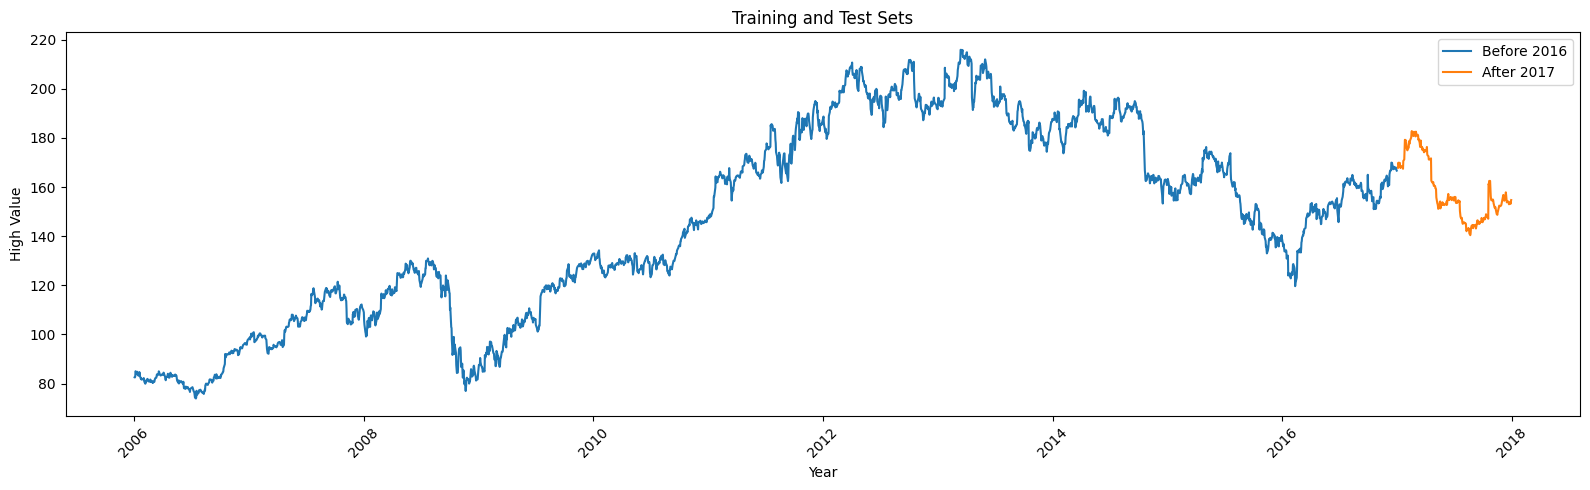

In [21]:
# Plotting training and test sets
plt.figure(figsize=(16, 5))
plt.plot(train['Date'], train['High'], label='Before 2016')
plt.plot(test['Date'], test['High'], label='After 2017')
plt.xlabel('Year')
plt.ylabel('High Value')
plt.title('Training and Test Sets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:

Enter

# Task 4: Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.

In [22]:
from sklearn.preprocessing import MinMaxScaler

data_train = train.drop(columns=['Date'])

train_scaled = MinMaxScaler().fit_transform(data_train)
train_scaled

array([[0.06065089],
       [0.06029868],
       [0.06311637],
       ...,
       [0.66074951],
       [0.65546633],
       [0.6534235 ]])

# Task 5:

In [23]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(train_scaled[i-60:i, 0])
  y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Task 6:

In [24]:
#reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train

array([[[0.06065089],
        [0.06029868],
        [0.06311637],
        ...,
        [0.0656523 ],
        [0.06656805],
        [0.06769513]],

       [[0.06029868],
        [0.06311637],
        [0.0781206 ],
        ...,
        [0.06656805],
        [0.06769513],
        [0.06875176]],

       [[0.06311637],
        [0.0781206 ],
        [0.07262609],
        ...,
        [0.06769513],
        [0.06875176],
        [0.06804734]],

       ...,

       [[0.43913779],
        [0.43660186],
        [0.45054945],
        ...,
        [0.51042547],
        [0.50993238],
        [0.50549451]],

       [[0.43660186],
        [0.45054945],
        [0.4509721 ],
        ...,
        [0.50993238],
        [0.50549451],
        [0.50866441]],

       [[0.45054945],
        [0.4509721 ],
        [0.4574528 ],
        ...,
        [0.50549451],
        [0.50866441],
        [0.51817413]]])

# Summary & Conclusion

So for this Hands On Activty, what I did at first is I uploaded the CSV file into the local save of google colab then after I did the procedures or task that were needed to do. But at first I encountered a problem, it was the same as the previous HOA because the libraries that were provided in the module was quite outdated for the google colab to operate so what I did was I simply updated the libraries that are needed to be updated in order for the code to work. It was a given that I need to modify some of the code provided but nonetheless I was still able to do the loading of datasets. After loading the dataset I preprocessed the dataset because there are 2 columns that have null values so naturally I had to drop them in order for my dataset to be more optimal. I have also learned on how can we separate or select the years on splitting the data and training set. After that I have prepared the dataset for LSTM and CNN. Overall I get the gist on how we can prepare the data for splitting in training and testing, I also was amazed after we have splitted the dataset, we were able to plot the dataset and in that the year before 2016 and after 2017 was showed in the plot.

In the end, I faced a few issues carrying out this HOA as I worked in outdated libraries which I ultimately solved by upgrading them. I faced my first problem in this first process but I got over it and then used the necessary preprocessing techniques to handle the missing values. I realised that I had to split the data into training set and testing set and also that I was supposed to select the years of income for analysis. The process of working with the set for the LSTM and CNN models exposed the subtleties. The visualization also revealed temporal trends as the major driving factor for the differences between the two years 2016 and beyond the year. This practical session has has made me grasp the data preparation methods and visualization techniques as well having improved the key concepts in machine learning.